In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator

In [145]:
anime = pd.read_csv('./archive/anime.csv')
rating = pd.read_csv('./archive/rating.csv')
rating.rating.replace({-1: np.nan}, inplace = True)
rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [135]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
print(anime.shape)
print(rating.shape)
print('用户数量',rating.user_id.unique().shape)

(12294, 7)
(7813737, 3)
用户数量 (73515,)


In [5]:
anime['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [6]:
# Join the two dataframes on the anime_id columns
merged = rating.merge(anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
merged.rename(columns = {'rating_user':'user_rating'}, inplace = True)

In [7]:
print(merged.shape)
merged.head()

(7813727, 9)


,user_id,anime_id,user_rating,name,genre,type,episodes,rating,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [8]:
# 自动过滤掉全nan的行列
piv = merged.pivot_table(index=['user_id'], columns=['name'], values='user_rating')

In [9]:
print(piv.shape)
piv.head()

(69600, 9926)


name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import sys
print('占用内存', sys.getsizeof(piv) / 1024 / 1024, 'MB')

占用内存 5271.295188903809 MB


In [11]:
# 查看用户评分动漫的个数（评分数过少的去掉）
piv_values = piv.fillna(-1, inplace=False)
piv_values = (piv_values.values==-1)

In [12]:
user_rate_num = 1 - piv_values.astype(int)
user_rate_num = np.sum(user_rate_num, axis=1)

In [13]:
import matplotlib.pyplot as plt
user_rate_num_ = [u for u in user_rate_num if u<100]
plt.hist(user_rate_num_)
plt.show()


Bad key text.latex.unicode in file /Users/caochenjie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/caochenjie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /Users/caochenjie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibr

<Figure size 640x480 with 1 Axes>

In [14]:
# 查看动漫被评分的个数（评分数过少的去掉）
anime_rate_num = 1 - piv_values.astype(int)
anime_rate_num = np.sum(anime_rate_num, axis=0)

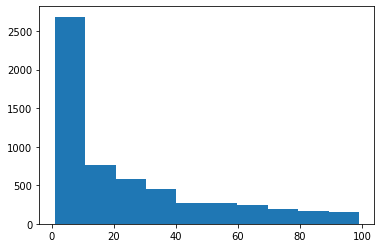

In [15]:
anime_rate_num_ = [a for a in anime_rate_num if a<100]
plt.hist(anime_rate_num_)
plt.show()

In [16]:
piv_filter = piv.loc[(user_rate_num>=40),(anime_rate_num>=40)]
print(piv_filter.shape)

(36884, 5479)


In [17]:
# Note: As we are subtracting the mean from each rating to standardize
# all users with only one rating or who had rated everything the same will be dropped

# Normalize the values
piv_norm = piv_filter.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)


# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [18]:
print(piv_norm.shape)
piv_norm.head()

(5479, 36749)


user_id,3,5,7,11,14,17,21,23,24,27,...,73497,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.156485,0.0,0.0,0.0,0.000000,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.234328,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.160976,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.156485,0.0,0.0,0.0,0.000000,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [159]:
mapping = pd.DataFrame(piv_norm.index)
mapping = mapping.merge(anime, left_on = 'name', right_on = 'name')
mapping.head(10)

,name,anime_id,genre,type,episodes,rating,members
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,7669,"Comedy, Fantasy, School",OVA,1,7.06,14351
1,&quot;Bungaku Shoujo&quot; Memoire,8481,"Drama, Romance, School",OVA,3,7.54,18013
2,&quot;Bungaku Shoujo&quot; Movie,6408,"Drama, Mystery, Romance, School",Movie,1,7.63,40984
3,.hack//G.U. Returner,2928,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
4,.hack//G.U. Trilogy,3269,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
5,.hack//G.U. Trilogy: Parody Mode,4469,"Comedy, Fantasy, Game, Parody, Sci-Fi",Special,1,6.67,7952
6,.hack//Gift,454,"Comedy, Fantasy, Game",OVA,1,6.37,15411
7,.hack//Intermezzo,1143,"Adventure, Fantasy, Game, Magic, Mystery, Sci-Fi",Special,1,6.71,16637
8,.hack//Liminality,299,"Game, Mystery, Sci-Fi",OVA,4,6.74,24304
9,.hack//Quantum,9332,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163


In [161]:
for i in range(mapping.shape[0]):
    print(mapping['name'][i], mapping['anime_id'][i])

&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi 7669
&quot;Bungaku Shoujo&quot; Memoire 8481
&quot;Bungaku Shoujo&quot; Movie 6408
.hack//G.U. Returner 2928
.hack//G.U. Trilogy 3269
.hack//G.U. Trilogy: Parody Mode 4469
.hack//Gift 454
.hack//Intermezzo 1143
.hack//Liminality 299
.hack//Quantum 9332
.hack//Quantum: Sore ike! Bokura no Chimuchimu-chan!! 10390
.hack//Roots 873
.hack//Sign 48
.hack//Tasogare no Udewa Densetsu 298
.hack//Tasogare no Udewa Densetsu: Offline de Aimashou 1994
.hack//The Movie: Sekai no Mukou ni 11375
.hack//Unison 1487
.hack//Versus: The Thanatos Report 15219
009 Re:Cyborg 11755
009-1 1583
009-1: R&amp;B 3234
07-Ghost 5525
1+2=Paradise 2730
1000-nen Joou: Queen Millennia 1549
1001 Nights 3914
11-nin Iru! 1901
11eyes 6682
11eyes Picture Drama 20557
11eyes: Momoiro Genmutan 7739
12-sai. 23579
12-sai.: Chicchana Mune no Tokimeki 32601
15 Bishoujo Hyouryuuki 5762
21-ji no Onna: Newscaster Katsuragi Miki 2863
30-sai no Hoken Taiiku 9624
30-sai no Hoken Taiiku 

Boukyaku no Senritsu 159
Bounen no Xamdou 4177
Bounty Dog: Getsumen no Ibu 1811
Boy Meets Harem The Animation 25667
Boys Be... 105
Brain Powerd 1542
Brandish 12055
Brave 10 11241
Brave Story 1681
Break Blade 22433
Break Blade 1: Kakusei no Toki 6772
Break Blade 2: Ketsubetsu no Michi 8514
Break Blade 3: Kyoujin no Ato 9252
Break Blade 4: Sanka no Chi 9465
Break Blade 5: Shisen no Hate 9724
Break Blade 6: Doukoku no Toride 10092
Break Blade Picture Drama 8648
Brigadoon: Marin to Melan 1450
Bronze: Kouji Nanjo Cathexis 3007
Bronze: Zetsuai Since 1989 1042
Brotherhood: Final Fantasy XV 33080
Brothers Conflict 15605
Brothers Conflict OVA 25437
Brothers Conflict Special 22745
Btooom! 14345
Bubblegum Crash 1348
Bubblegum Crisis 1347
Bubblegum Crisis Tokyo 2040 568
Bubuki Buranki 32023
Buddha Saitan 6985
Buddy Complex 21437
Buddy Complex: Kanketsu-hen - Ano Sora ni Kaeru Mirai de 24469
Buki yo Saraba 17677
Bungou Stray Dogs 31478
Burn Up Excess 370
Burn Up Scramble 693
Burn Up! 767
Burn Up! W

Divergence Eve 294
Divergence Eve 2: Misaki Chronicles 295
Divine Gate 31710
Dog Days 10155
Dog Days&#039; 11783
Dog Days&#039; Specials 17419
Dog Days&#039;&#039; 16385
Doggy Poo 4147
Dogs: Bullets &amp; Carnage 5593
Dokidoki Oyako Lesson: Oshiete H na Obenkyou 3944
Dokidoki! Precure 16419
Dokkoida 1837
Dominion 1151
Donburi Kazoku 3422
Donten ni Warau 21743
Doraemon 501
Doraemon (1979) 2471
Doraemon Movie 01: Nobita no Kyouryuu 3727
Doraemon Movie 11: Nobita to Animal Planet 2677
Doraemon Movie 12: Nobita no Dorabian Nights 2670
Doraemon Movie 13: Nobita to Kumo no Oukoku 2661
Doraemon Movie 21: Nobita no Taiyou Ou Densetsu 7045
Doraemon Movie 23: Nobita to Robot Kingdom 2655
Doraemon Movie 24: Nobita to Fushigi Kaze Tsukai 2393
Doraemon Movie 26: Nobita no Kyouryuu 2006 2392
Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai 2673
Doraemon Movie 28: Nobita to Midori no Kyojin Den 5096
Dore Dore no Uta 4158
Dorei Ichiba 3385
Dorei Kaigo 3538
Dorei Maid Princess 3

Girls und Panzer: Fushou - Akiyama Yukari no Sensha Kouza 18343
Girls und Panzer: Kore ga Hontou no Anzio-sen Desu! 18619
Girls und Panzer: Shoukai Shimasu! 16199
Glass no Hana to Kowasu Sekai 25907
Glass no Kamen 506
Glass no Kamen (2005) 1974
Glass no Kantai: La Legende du Vent de l&#039;Univers 973
Glasslip 23079
Go! Go! 575 21267
Go! Princess Precure 28669
Gochuumon wa Usagi Desu ka? 21273
Gochuumon wa Usagi Desu ka?? 29787
God Eater 27631
God Eater Prologue 10470
Gogo no Kouchou: Junai Mellow yori 14993
Gokicha!! 10258
Gokinjo Monogatari 852
Goku Sayonara Zetsubou Sensei 4872
Gokudou-kun Manyuuki 2409
Gokujo.: Gokurakuin Joshikou Ryou Monogatari 11769
Gokujo.: Souda Onsen ni Ikou!! 19431
Gokujou Seitokai 456
Gokukoku no Brynhildr 21431
Gokukoku no Brynhildr Special 24695
Gokusen 242
Golden Boy 268
Golden Time 17895
Golgo 13 1760
Golgo 13 (TV) 4039
Golgo 13: Queen Bee 1761
Good Morning Call 1056
Goshuushou-sama Ninomiya-kun 2494
Gosick 8425
Gosick Recap 10504
Goulart Knights: Evoke

JoJo no Kimyou na Bouken: Stardust Crusaders 20899
JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season 26055
Jokei Kazoku: Inbou 4698
Joker Game 31405
Joker Game: Kuroneko Yoru no Bouken 33129
Jormungand 12413
Jormungand: Perfect Order 13331
Jormungand: Perfect Order - First Stage Soushuuhen 15735
Joshikousei no Koshitsuki 18691
Joshikousei: Girl&#039;s High 863
Joshikousei: Girl&#039;s High Specials 6657
Joshiraku 12679
Joshiraku OVA 15591
Joukamachi no Dandelion 28387
Jumping 2211
Jungle Book Shounen Mowgli 2569
Jungle Taitei 1572
Jungle Taitei (1989) 2556
Jungle Taitei Movie (1997) 2264
Jungle Taitei: Yuuki ga Mirai wo Kaeru 6909
Jungle de Ikou! 2524
Jungle wa Itsumo Hare nochi Guu 253
Jungle wa Itsumo Hare nochi Guu Deluxe 254
Jungle wa Itsumo Hare nochi Guu Final 255
Junjou Romantica 3092
Junjou Romantica 2 4814
Junjou Romantica 3 25649
Junjou Romantica OVA 13767
Junjou Romantica Special 6553
Junjou Shoujo Et Cetera 19569
Junk Boy 3889
Junkers Come Here 1116
Junketsu no Maria 

Koutetsushin Jeeg 2157
Kowabon 30948
Kowaku no Toki 11185
Kowarekake no Orgel 9213
Kowarekake no Orgel (Movie) 10918
Kowarekake no Orgel Special 10122
Koyomimonogatari 32268
Kujibiki Unbalance 669
Kujibiki♥Unbalance 1591
Kujira no Chouyaku 1204
Kuma Miko 31804
Kumo no Mukou, Yakusoku no Basho 433
Kumo no You ni Kaze no You ni 1032
Kurage no Shokudou 29301
Kuragehime 8129
Kuragehime: Eiyuu Retsuden☆ 9754
Kuragehime: Soreike! Amars Tankentai 10391
Kurai Mirai 3034
Kurau Phantom Memory 483
Kure-nai 3358
Kure-nai OVA 8078
Kurenai no Buta 416
Kuro Ai: Hitoyozumakan Inkou Rannyuuroku 2841
Kuro Nyago 4398
Kuro no Danshou 220
Kuro no Sumika: Chronus 20889
Kuro to Kin no Akanai Kagi. 16023
Kurogane Communication 1660
Kurogane no Linebarrels 3653
Kurogane no Linebarrels Specials 7540
Kurohime: Shikkoku no Yakata 1385
Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru 11827
Kurokami The Animation 5079
Kurokami: Intermission 6587
Kurokami: Tora to Tsubasa 6794
Kuroko no Basket 11771
Kuroko no Basket 2n

Mahoutsukai Tai! 630
Mahoutsukai Tai! OVA 629
Mahoutsukai ni Taisetsu na Koto 273
Mahoutsukai ni Taisetsu na Koto: Natsu no Sora 4483
Mai Mai Shinko to Sennen no Mahou 5084
Mai-HiME 98
Mai-HiME Specials 673
Mai-HiME: Kuro no Mai/Saigo no Bansan 8062
Mai-Otome 99
Mai-Otome 0: S.ifr 3268
Mai-Otome Special: Otome no Inori 8518
Mai-Otome Specials 1659
Mai-Otome Zwei 1609
Mai-Otome Zwei Special 6199
Maid in Heaven SuperS 2188
Maison Ikkoku 1453
Maison Ikkoku: Ikkokujima Nanpa Shimatsuki 2459
Maison Ikkoku: Kanketsu-hen 2460
Maji de Watashi ni Koi Shinasai! 10213
Majimoji Rurumo 23945
Majin Bone 21835
Majin Tantei Nougami Neuro 2985
Majo no Takkyuubin 512
Majokko Shimai no Yoyo to Nene 15813
Major Movie: Yuujou no Winning Shot 5029
Major S1 627
Major S2 558
Major S3 1842
Major S4 3226
Major S5 5028
Major S6 7655
Major: Message 9890
Major: World Series 11917
Majutsushi Orphen 1017
Majutsushi Orphen: Revenge 1018
Makai Kishi Ingrid 6590
Makai Ouji: Devils and Realist 16890
Makai Senki Disgaea 

Naruto: The Cross Roads 7367
Nasu: Andalusia no Natsu 1209
Nasu: Suitcase no Wataridori 3111
Natsu e no Tobira 2621
Natsu no Arashi! 5597
Natsu no Arashi! Akinaichuu 6712
Natsu-iro Egao de 1, 2, Jump! 11033
Natsu-iro Kiseki 12119
Natsu-iro Kiseki: 15-kaime no Natsuyasumi 15431
Natsu-iro no Sunadokei 622
Natsume Yuujinchou 4081
Natsume Yuujinchou San 10379
Natsume Yuujinchou Shi 11665
Natsume Yuujinchou: Itsuka Yuki no Hi ni 20651
Natsume Yuujinchou: Nyanko-sensei to Hajimete no Otsukai 18849
Natsumushi The Animation 7276
Natsuyasumi. 17371
Natsuyuki Rendezvous 13585
Nazo no Kanojo X 12467
Nazo no Kanojo X: Nazo no Natsu Matsuri 13093
Nee Summer! 11321
Nee, Chanto Shiyou Yo! 3771
Needless 6030
Needless Specials 7322
Negima!? 1546
Negima!? Haru Special!? 1619
Negima!? Natsu Special!? 1732
Nejimaki Seirei Senki: Tenkyou no Alderamin 31764
Neko Ramen 3535
Neko no Ongaeshi 597
Nekogami Yaoyorozu 9934
Nekogami Yaoyorozu: Ohanami Ghostbusters 10936
Nekojiru Gekijou Jirujiru Original 1062
Neko

Pokemon Best Wishes! Season 2: Episode N 17115
Pokemon Best Wishes! Season 2: Kyurem vs. Seikenshi 12671
Pokemon Best Wishes! Season 2: Shinsoku no Genosect - Mewtwo Kakusei 16680
Pokemon Best Wishes!: Victini to Kuroki Eiyuu Zekrom 9917
Pokemon Best Wishes!: Victini to Shiroki Eiyuu Reshiram 10740
Pokemon Black and White 2: Introduction Movie 14123
Pokemon Crystal: Raikou Ikazuchi no Densetsu 1525
Pokemon Diamond &amp; Pearl 1565
Pokemon Diamond &amp; Pearl Specials 10302
Pokemon Diamond &amp; Pearl: Arceus Choukoku no Jikuu e 6178
Pokemon Diamond &amp; Pearl: Dialga vs. Palkia vs. Darkrai 2847
Pokemon Diamond &amp; Pearl: Genei no Hasha Zoroark 7695
Pokemon Diamond &amp; Pearl: Giratina to Sora no Hanataba Sheimi 4026
Pokemon Fushigi no Dungeon: Shutsudou Pokemon Kyuujotai Ganbaruzu! 2842
Pokemon Fushigi no Dungeon: Sora no Tankentai - Toki to Yami wo Meguru Saigo no Bouken 6275
Pokemon Fushigi no Dungeon: Toki no Tankentai, Yami no Tankentai 5256
Pokemon Housoukyoku 2363
Pokemon Ome

Saint Seiya: Legend of Sanctuary 10687
Saint Seiya: Meiou Hades Elysion-hen 3515
Saint Seiya: Meiou Hades Juuni Kyuu-hen 1257
Saint Seiya: Meiou Hades Meikai-hen 1253
Saint Seiya: Saishuu Seisen no Senshi-tachi 1260
Saint Seiya: Shinku no Shounen Densetsu 1255
Saint Seiya: Soul of Gold 28215
Saint Seiya: Soushuuhen 6153
Saint Seiya: Tenkai-hen Josou - Overture 1259
Saint Seiya: The Hades Chapter Sanctuary - Yomigaerishi Gold Saint-tachi no Shinwa 6154
Saint Seiya: The Lost Canvas - Meiou Shinwa 6171
Saint Seiya: The Lost Canvas - Meiou Shinwa 2 9130
Saint☆Oniisan 15775
Saint☆Oniisan (Movie) 15771
Saishuu Chikan Densha 2275
Saishuu Heiki Kanojo 529
Saishuu Heiki Kanojo: Another Love Song 609
Saishuu Shiken Kujira 2967
Saishuu Shiken Kujira Progressive 4213
Saiunkoku Monogatari 957
Saiunkoku Monogatari 2nd Season 1914
Saiunkoku Monogatari Soushuuhen 2193
Saiyuuki Gaiden 9088
Saiyuuki Reload 130
Saiyuuki Reload Gunlock 131
Saiyuuki Reload: Burial 2143
Sakamichi no Apollon 12531
Sakamoto d

Steins;Gate 9253
Steins;Gate Movie: Fuka Ryouiki no Déjà vu 11577
Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero 32188
Steins;Gate: Oukoubakko no Poriomania 10863
Steins;Gate: Soumei Eichi no Cognitive Computing 27957
Stella Jogakuin Koutou-ka C³-bu 17821
Stitch! 5027
Strait Jacket 3086
Strange Dawn 171
Strange+ 21067
Stranger: Mukou Hadan 2418
Stranger: Mukou Hadan Pilot 14617
Stratos 4 421
Stratos 4 Advance 423
Stratos 4 Advance Kanketsu-hen 1584
Stratos 4 OVA 422
Stratosphera no Yousei 2788
Strawberry Panic 855
Street Fighter Alpha: Generations 950
Street Fighter II V 876
Street Fighter II: The Movie 1362
Street Fighter Zero The Animation 979
Street Fighter: Aratanaru Kizuna 5369
Stretta The Animation 6194
Strike Witches 3667
Strike Witches 2 6381
Strike Witches Movie 9751
Strike Witches OVA 1862
Strike Witches: Operation Victory Arrow 23725
Strike the Blood 18277
Strike the Blood: Valkyria no Oukoku-hen 30321
Stringendo+Accelerando Ultimatum Sera 4502
Stringendo: Angel

Uchuu Senkan Yamato 2 1651
Uchuu Senkan Yamato 2199 12029
Uchuu Senkan Yamato 2199: Hoshimeguru Hakobune 23249
Uchuu Senkan Yamato III 1652
Uchuu Senkan Yamato: Fukkatsu-hen 7144
Uchuu Show e Youkoso 8115
Uchuu no Kishi Tekkaman Blade 1459
Uchuu no Kishi Tekkaman Blade II 1460
Uchuu no Kishi Tekkaman Blade OVA: Twin Blood 2300
Uchuu no Senshi 2516
Uchuu no Stellvia 113
Uhou Renka 13785
Ultra Maniac 178
Ultra Maniac OVA 179
Ultraviolet: Code 044 4264
Umezu Kazuo no Noroi 6276
Umi Monogatari: Anata ga Ite Kureta Koto 6129
Umi Monogatari: Anata ga Ite Kureta Koto - Shinjiau Kokoro 6883
Umi ga Kikoeru 743
Umineko no Naku Koro ni 4896
Umineko no Naku Koro ni Specials 7568
Under the Dog 27387
Unico 2427
Unico: Mahou no Shima e 2429
Universe 4467
Upotte!! 12317
Upotte!! OVA 14173
Uragiri wa Boku no Namae wo Shitteiru 7058
Urawa no Usagi-chan 27927
Urda 1102
Urusei Yatsura 1293
Urusei Yatsura Movie 1: Only You 1920
Urusei Yatsura Movie 2: Beautiful Dreamer 1921
Urusei Yatsura Movie 3: Remember

In [19]:
print('占用内存', sys.getsizeof(piv_norm) / 1024 / 1024, 'MB')

占用内存 1536.6101360321045 MB


In [20]:
# 保存norm矩阵
import pickle
with open('CF_data/piv_norm.pkl','wb') as w:
    pickle.dump(piv_norm, w)

In [ ]:
# U, S, V = np.linalg.svd(piv_norm.values)
# print(U.shape, S.shape, V.shape)

In [128]:
print(np.sum(piv_norm.index=='Clannad: After Story'))
print(np.argmax(piv_norm.index=='Clannad: After Story'))

1
806


In [129]:
new_user = np.zeros([1, 5479]) # 4597 steinsgates
new_user[0, 4597]=0.7
new_user[0, 828]=0.7
new_user[0, 1376]=0.7
new_user[0, 806]=-0.5
print(new_user.shape, piv_norm.shape)

(1, 5479) (5479, 36749)


In [130]:
sim_scores = np.matmul(new_user, piv_norm.values)

In [131]:
sim_scores_sorted = np.sort(sim_scores)[0][::-1]
sim_scores_argsort = np.argsort(sim_scores)[0][::-1]

In [132]:
print(sim_scores_sorted)
print(sim_scores_argsort)

[ 1.42952381  1.25140086  1.24833333 ... -0.84737533 -0.92942943
 -0.98074074]
[ 7124 17383 31615 ...  2139 20126 34096]


In [133]:
topk_users = sim_scores_argsort[:25]
topk_mat = piv_norm.iloc[:, topk_users]

print(topk_mat.shape)
topk_mat.head()

(5479, 25)


user_id,14393,34534,62768,13431,27764,32380,15480,35992,22917,22158,...,6239,1015,32672,59573,31802,39571,34941,21976,58688,8523
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.02521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.02521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.22521,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
topk_mat_values = topk_mat.values
topk_index = np.argsort(topk_mat_values, axis=0)[::-1, :]
# topk_scores = np.sort(topk_mat_values, axis=0)[::-1,:]
# 选出这些用户喜欢的top10取并集
topk_index = topk_index[:15,:]
# print(topk_index)
import collections
hit_dict = collections.defaultdict(int)
for i in range(topk_index.shape[0]):
    for j in range(topk_index.shape[1]):
        target_i = topk_index[i,j]
        if topk_mat_values[target_i, j]>0:
            hit_dict[topk_mat.index[target_i]] += 1
hit_dict = sorted([(k,v) for k,v in hit_dict.items()], key=lambda x:x[1], reverse=True)
print(hit_dict)

[('Code Geass: Hangyaku no Lelouch R2', 23), ('Fullmetal Alchemist: Brotherhood', 23), ('Steins;Gate', 21), ('Code Geass: Hangyaku no Lelouch', 18), ('Death Note', 10), ('Tengen Toppa Gurren Lagann', 9), ('Shingeki no Kyojin', 7), ('Fate/Zero', 7), ('One Punch Man', 6), ('Gintama', 6), ('Fate/Zero 2nd Season', 5), ('Suzumiya Haruhi no Shoushitsu', 5), ('Cowboy Bebop', 5), ('Hunter x Hunter (2011)', 5), ('Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.', 5), ('Monster', 5), ('Toradora!', 5), ('Baccano!', 4), ('No Game No Life', 4), ('Gintama&#039;', 3), ('Great Teacher Onizuka', 3), ('Boku dake ga Inai Machi', 3), ('Fullmetal Alchemist', 3), ('Berserk', 3), ('Elfen Lied', 3), ('Hellsing Ultimate', 3), ('Steins;Gate Movie: Fuka Ryouiki no Déjà vu', 3), ('Kuroko no Basket 2nd Season', 3), ('Gintama&#039;: Enchousen', 3), ('Monogatari Series: Second Season', 3), ('Danshi Koukousei no Nichijou', 3), ('Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 3), ('Durarara!!', 2), ('Fa